<a href="https://colab.research.google.com/github/Shumaila-Shaikh/House_Analysis_Story_telling/blob/main/Shumaila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOAD ESSENTIAL LIBRARIES**



>




In [1]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

**LOAD DATA SET **

In [2]:
import pandas as pd

# Sample data dictionary (showing just a few rows to keep it simple)
data = {
    'price': [13300000, 12250000, 12250000, 12215000, 11410000],
    'area': [7420, 8960, 9960, 7500, 7420],
    'bedrooms': [4, 4, 3, 4, 4],
    'bathrooms': [2, 4, 2, 2, 1],
    'stories': [3, 4, 2, 2, 2],
    'mainroad': ['yes', 'yes', 'yes', 'yes', 'yes'],
    'guestroom': ['no', 'no', 'no', 'no', 'yes'],
    'basement': ['no', 'no', 'yes', 'yes', 'yes'],
    'hotwaterheating': ['no', 'no', 'no', 'no', 'no'],
    'airconditioning': ['yes', 'yes', 'no', 'yes', 'yes'],
    'parking': [2, 3, 2, 3, 2],
    'prefarea': ['yes', 'no', 'yes', 'yes', 'no'],
    'furnishingstatus': ['furnished', 'furnished', 'semi-furnished', 'furnished', 'furnished']
}


In [3]:
# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv("Housing.csv", index=False)

# Confirm file creation and preview
print("Sample Housing.csv created:")
print(df.head())

Sample Housing.csv created:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


**"""EXPLORE AND CLEAN DATA"""**

In [4]:
df.head()

df.columns

df.shape

df.info()

missing=df.isnull().sum()
missing

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             5 non-null      int64 
 1   area              5 non-null      int64 
 2   bedrooms          5 non-null      int64 
 3   bathrooms         5 non-null      int64 
 4   stories           5 non-null      int64 
 5   mainroad          5 non-null      object
 6   guestroom         5 non-null      object
 7   basement          5 non-null      object
 8   hotwaterheating   5 non-null      object
 9   airconditioning   5 non-null      object
 10  parking           5 non-null      int64 
 11  prefarea          5 non-null      object
 12  furnishingstatus  5 non-null      object
dtypes: int64(6), object(7)
memory usage: 652.0+ bytes


,price,area,bedrooms,bathrooms,stories,parking
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.228500e+07,8252.000000,3.800000,2.200000,2.600000,2.400000
std,6.714164e+05,1158.499029,0.447214,1.095445,0.894427,0.547723
min,1.141000e+07,7420.000000,3.000000,1.000000,2.000000,2.000000
25%,1.221500e+07,7420.000000,4.000000,2.000000,2.000000,2.000000
50%,1.225000e+07,7500.000000,4.000000,2.000000,2.000000,2.000000
75%,1.225000e+07,8960.000000,4.000000,2.000000,3.000000,3.000000
max,1.330000e+07,9960.000000,4.000000,4.000000,4.000000,3.000000


**"""SEPARATE DATA TYPES"""**

In [5]:
# Separate numerical and categorical columns
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

print("Numerical Features List:", list(num_features))
print("Categorical features list:",list (cat_features))

""" Numerical DataFrame Summary"""

# Step 1: Identify numerical columns
numerics = df.select_dtypes(include=["int64", "float64"]).columns

# Step 2: Create subset of only numerical columns
numeric_df = df[numerics]

# Step 3: Loop and print stats for each numerical column
for col in numeric_df.columns:
    print(f"\n📊 Stats for '{col}':")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])
    print("Std Dev:", df[col].std())
    print("Variance:", df[col].var())
    print("Skew:", df[col].skew())
    print("Kurtosis:", df[col].kurt())
    print("Min:", df[col].min())
    print("Max:", df[col].max())


Numerical Features List: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical features list: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

📊 Stats for 'price':
Mean: 12285000.0
Median: 12250000.0
Mode: 12250000
Std Dev: 671416.4132637808
Variance: 450800000000.0
Skew: 0.5166822861910191
Kurtosis: 2.1341342745746665
Min: 11410000
Max: 13300000

📊 Stats for 'area':
Mean: 8252.0
Median: 7500.0
Mode: 7420
Std Dev: 1158.4990289162956
Variance: 1342120.0
Skew: 1.007727127462892
Kurtosis: -1.0328684453758141
Min: 7420
Max: 9960

📊 Stats for 'bedrooms':
Mean: 3.8
Median: 4.0
Mode: 4
Std Dev: 0.4472135954999579
Variance: 0.19999999999999998
Skew: -2.2360679774997885
Kurtosis: 4.999999999999989
Min: 3
Max: 4

📊 Stats for 'bathrooms':
Mean: 2.2
Median: 2.0
Mode: 2
Std Dev: 1.0954451150103321
Variance: 1.2
Skew: 1.2932338163316417
Kurtosis: 2.9166666666666625
Min: 1
Max: 4

📊 Stats for 'stories':
Mean: 2.6
Media

**"""Histograms for Numeric Features"""**


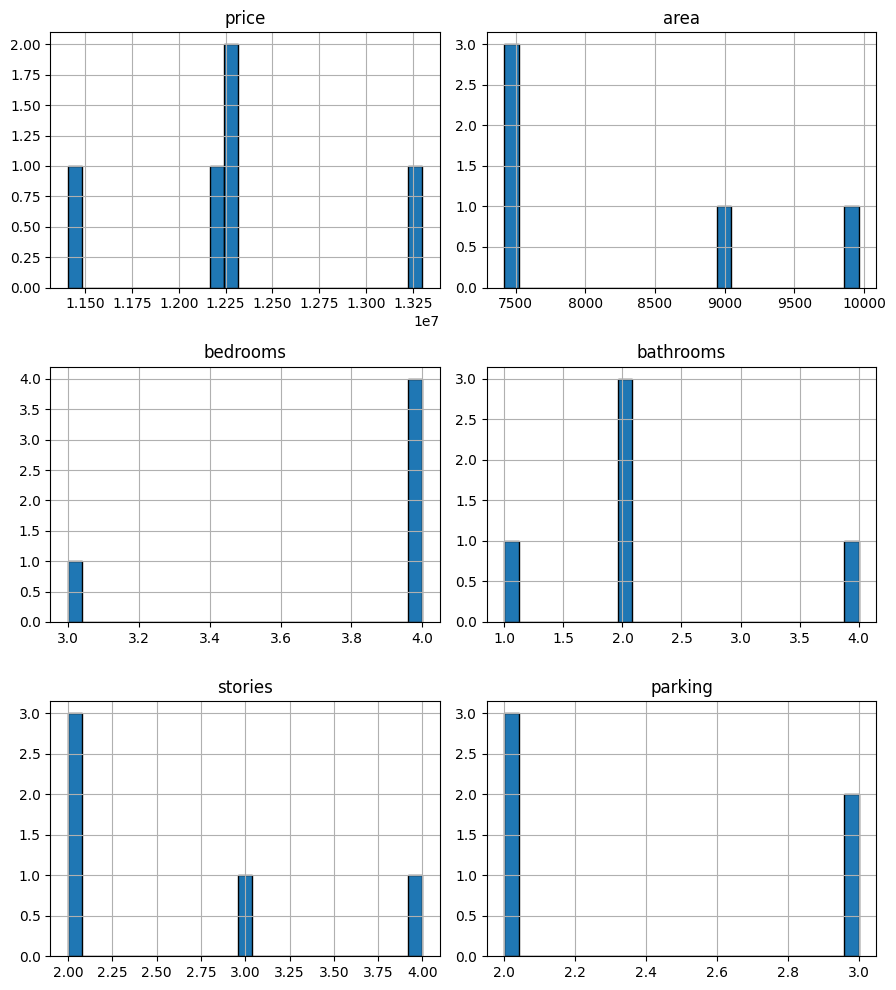

In [6]:
numeric_df.hist(figsize=(9, 10), bins=25, edgecolor='black')
plt.tight_layout()
plt.show()

**""" Detect Outliers Using Boxplots"""**





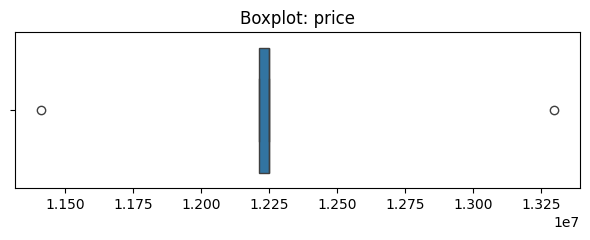

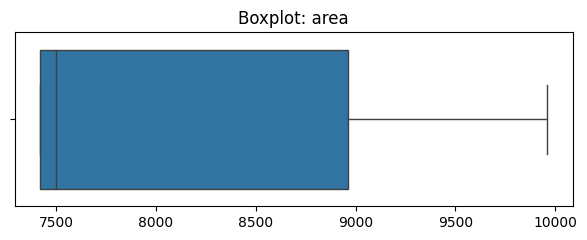

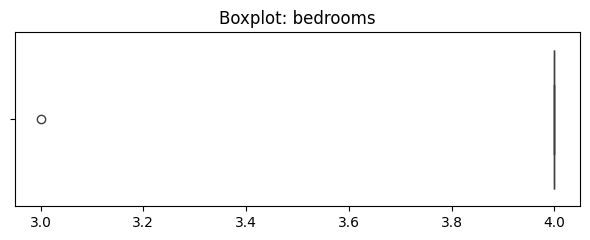

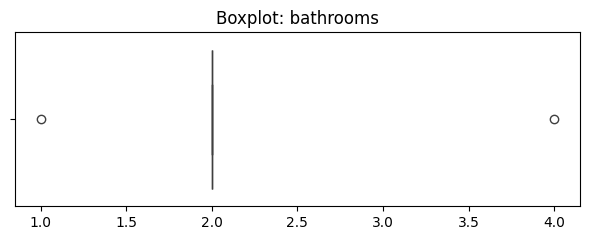

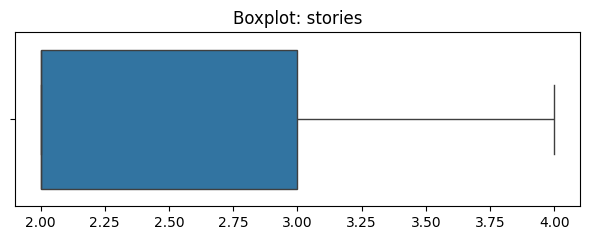

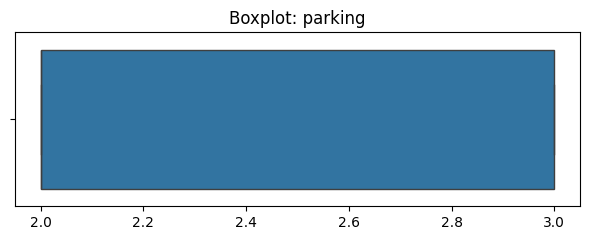

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in numerics:
    plt.figure(figsize=(6, 2.5))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot: {column}")
    plt.tight_layout()
    plt.show()

** Univariate Analysis - Price**

Price Summary:
count    5.000000e+00
mean     1.228500e+07
std      6.714164e+05
min      1.141000e+07
25%      1.221500e+07
50%      1.225000e+07
75%      1.225000e+07
max      1.330000e+07
Name: price, dtype: float64
CV (Price): 5.47 %


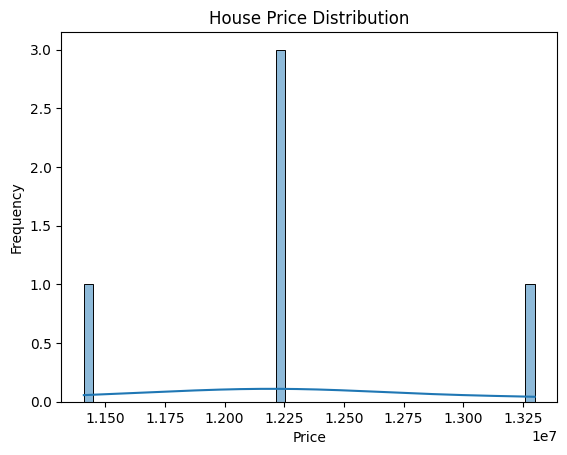

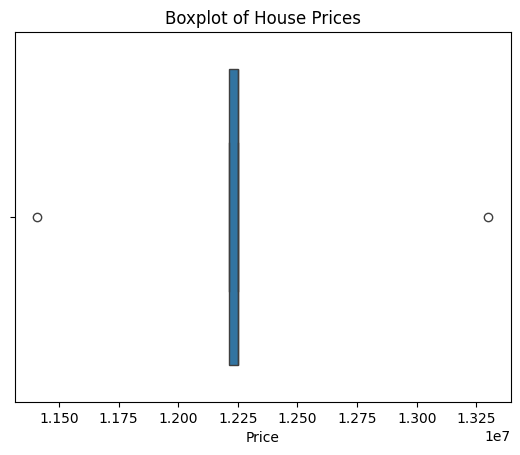

In [13]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

# 2. Load dataset
data = pd.read_csv("/content/Housing.csv")  # Change path if needed

# 3. Summary statistics
price_desc = data["price"].describe()
print("Price Summary:")
print(price_desc)

# 4. Coefficient of Variation
cv = data["price"].std() / data["price"].mean() * 100
print("CV (Price):", round(cv, 2), "%")

# 5. Histogram
sns.histplot(data=data, x="price", kde=True)
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# 6. Boxplot
sns.boxplot(x=data["price"])
plt.title("Boxplot of House Prices")
plt.xlabel("Price")
plt.show()


**Price Outlier Detection**

In [14]:
Q1 = data["price"].quantile(0.25)
Q3 = data["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

price_outliers = data["price"] > upper
outlier_prices = data[price_outliers]
print(outlier_prices[["price", "area"]])


      price  area
0  13300000  7420


**""" Area Analysis & Outliers"""**




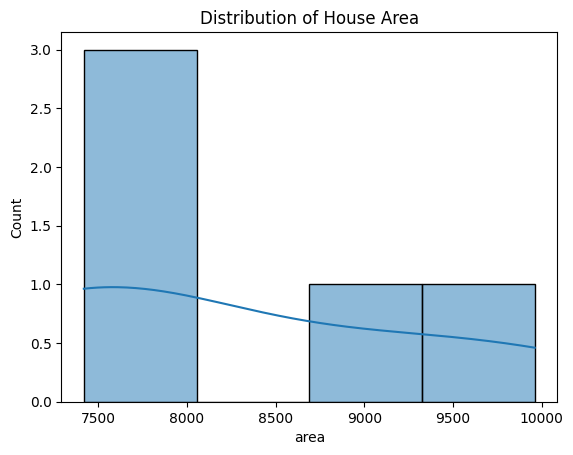

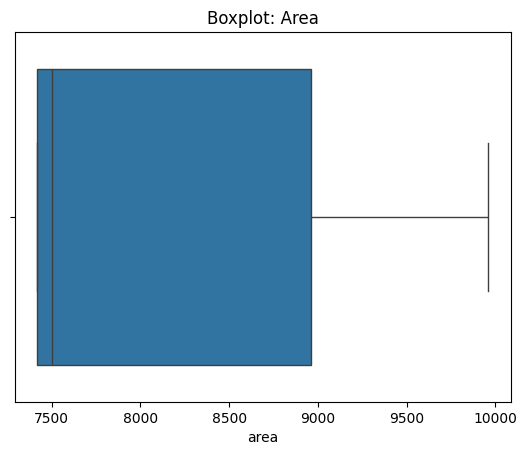

Empty DataFrame
Columns: [area, price]
Index: []


In [15]:
sns.histplot(data=data, x="area", kde=True)
plt.title("Distribution of House Area")
plt.show()

sns.boxplot(x=data["area"])
plt.title("Boxplot: Area")
plt.show()

Q1_area = data["area"].quantile(0.25)
Q3_area = data["area"].quantile(0.75)
IQR_area = Q3_area - Q1_area

upper_area = Q3_area + 1.5 * IQR_area
area_outliers = data["area"] > upper_area
print(data[area_outliers][["area", "price"]])



""" Bedroom Count Analysis"""

/tmp/ipython-input-3124689789.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="bedrooms", palette="coolwarm", edgecolor="black")


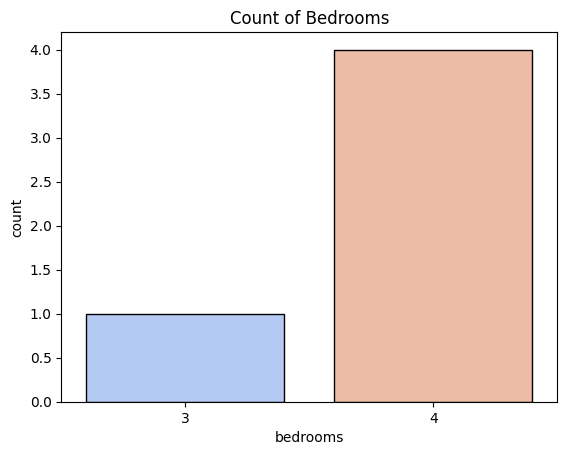

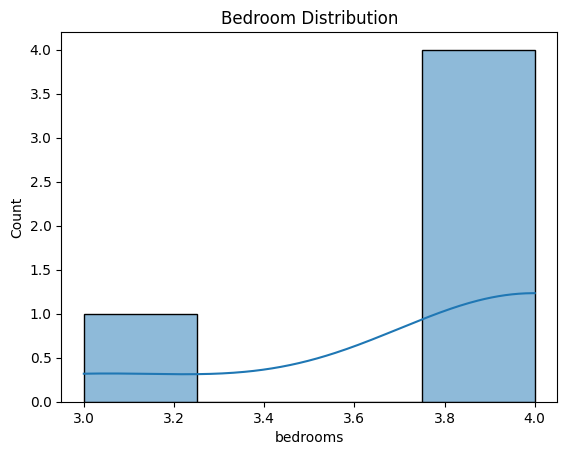

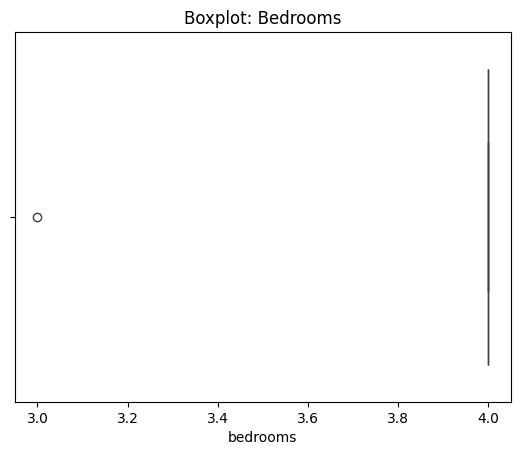

In [16]:
sns.countplot(data=data, x="bedrooms", palette="coolwarm", edgecolor="black")
plt.title("Count of Bedrooms")
plt.show()

sns.histplot(data=data, x="bedrooms", kde=True)
plt.title("Bedroom Distribution")
plt.show()

sns.boxplot(x=data["bedrooms"])
plt.title("Boxplot: Bedrooms")
plt.show()


** Outliers in Bedrooms**

In [17]:
Q1_b = data["bedrooms"].quantile(0.25)
Q3_b = data["bedrooms"].quantile(0.75)
IQR_b = Q3_b - Q1_b

upper_b = Q3_b + 1.5 * IQR_b
bedroom_outliers = data["bedrooms"] > upper_b
print(data[bedroom_outliers]["bedrooms"].value_counts())


Series([], Name: count, dtype: int64)


"""Bivariate Analysis - Price vs Area

"""

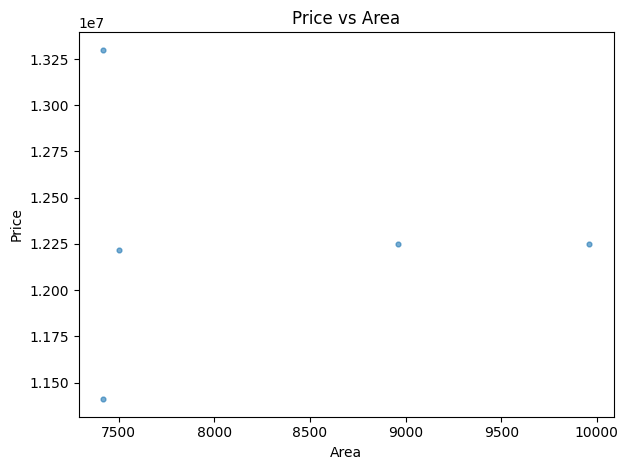

In [18]:
plt.scatter(data["area"], data["price"], alpha=0.6, s=12)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area")
plt.tight_layout()
plt.show()

"""Price vs Bathrooms

"""

bathrooms
1    1.141000e+07
2    1.258833e+07
4    1.225000e+07
Name: price, dtype: float64


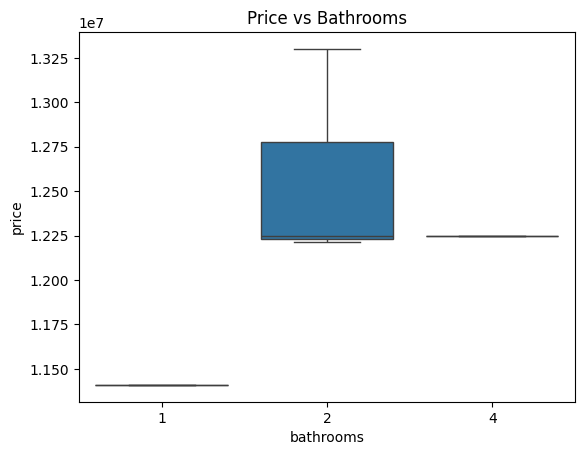

In [19]:
price_by_bath = data.groupby("bathrooms")["price"].mean()
print(price_by_bath)

sns.boxplot(x="bathrooms", y="price", data=data)
plt.title("Price vs Bathrooms")
plt.show()

 (Story Summary)

After analyzing the housing data:

Prices and area both show right-skewed distributions with a few extreme outliers.

Most houses are 2–3 bedrooms and fall in a mid-price and mid-area range.

Outliers in price and area exist and should be carefully considered when modeling.

Bathrooms and area show a positive relationship with price, but not perfectly linear.

It's better to compare homes by median price grouped by key features (bedrooms, stories, furnishing).

